In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

In [2]:
#creating database connection
conn = sqlite3.connect("shops.db")
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SaleestoPurchaseRatio,SalestoPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.99,50.0,1,0.71,86.0,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667


<br>**Exploratory Data Analysis**</br>
<br>
**.**  Previously, we examined the various tables in the database to identify key variables,understand their relationships,and determine which ones should be included in the final analysis.</br>
<br>**.** In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns,identify anomalies, and ensure data quality before proceeding with further analysis.</br>

In [3]:
# Summary Statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalExciseTax,10692.0,1.774226e+03,10975.582240,0.00,4.800000,46.570000,418.650000,3.682428e+05


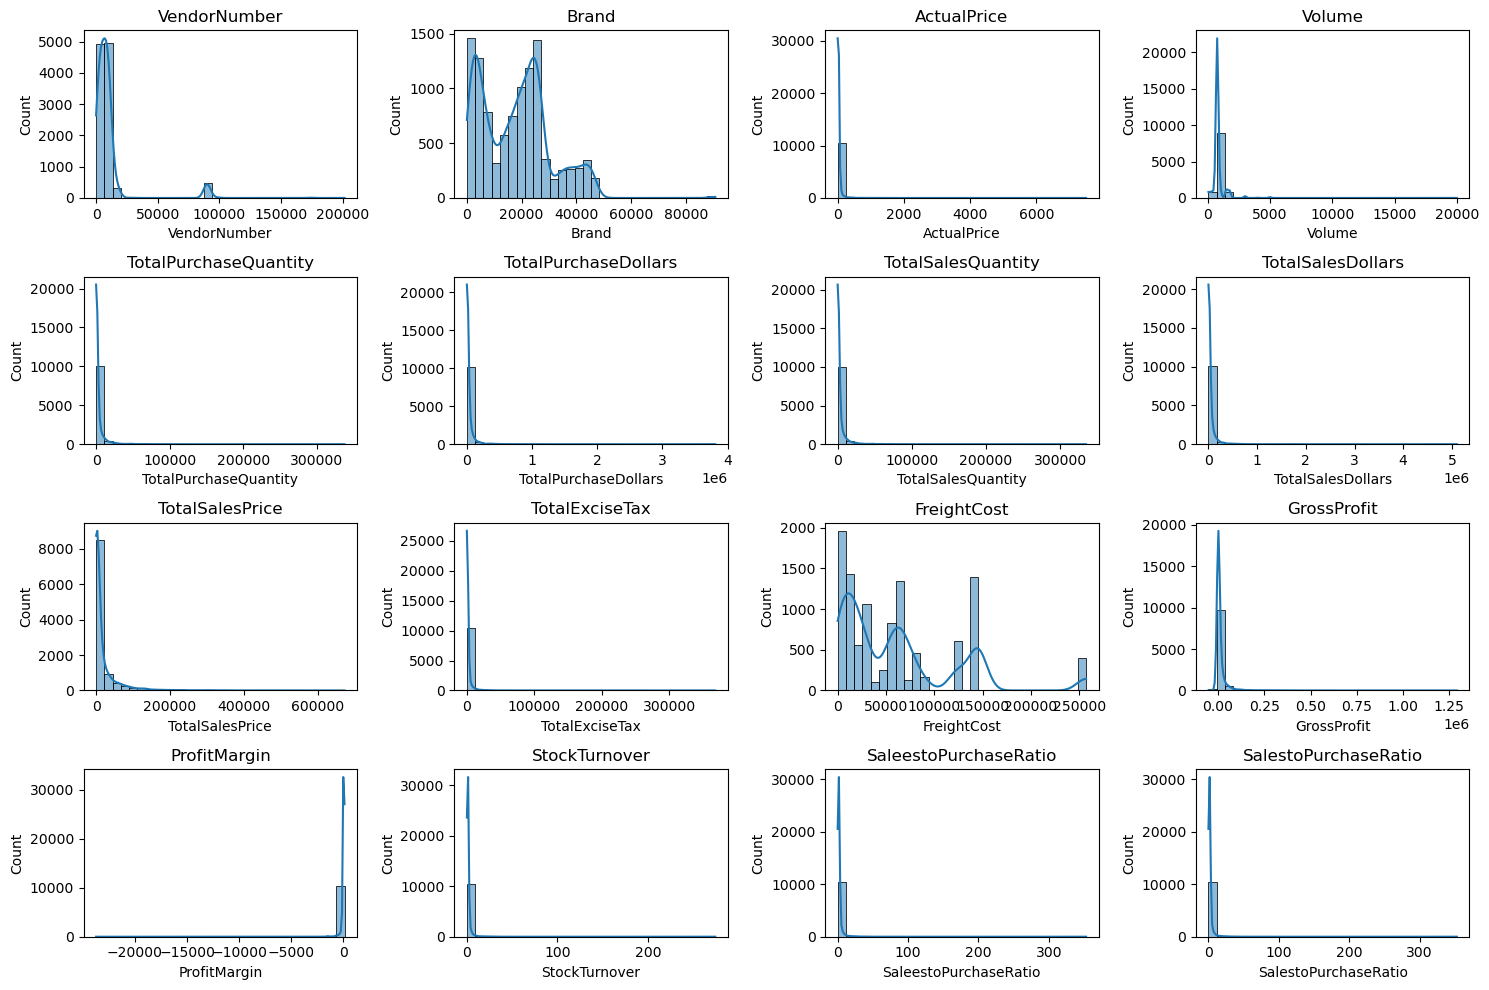

In [4]:
#Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout() 
plt.savefig("aman.png", dpi = 1000)
plt.show()

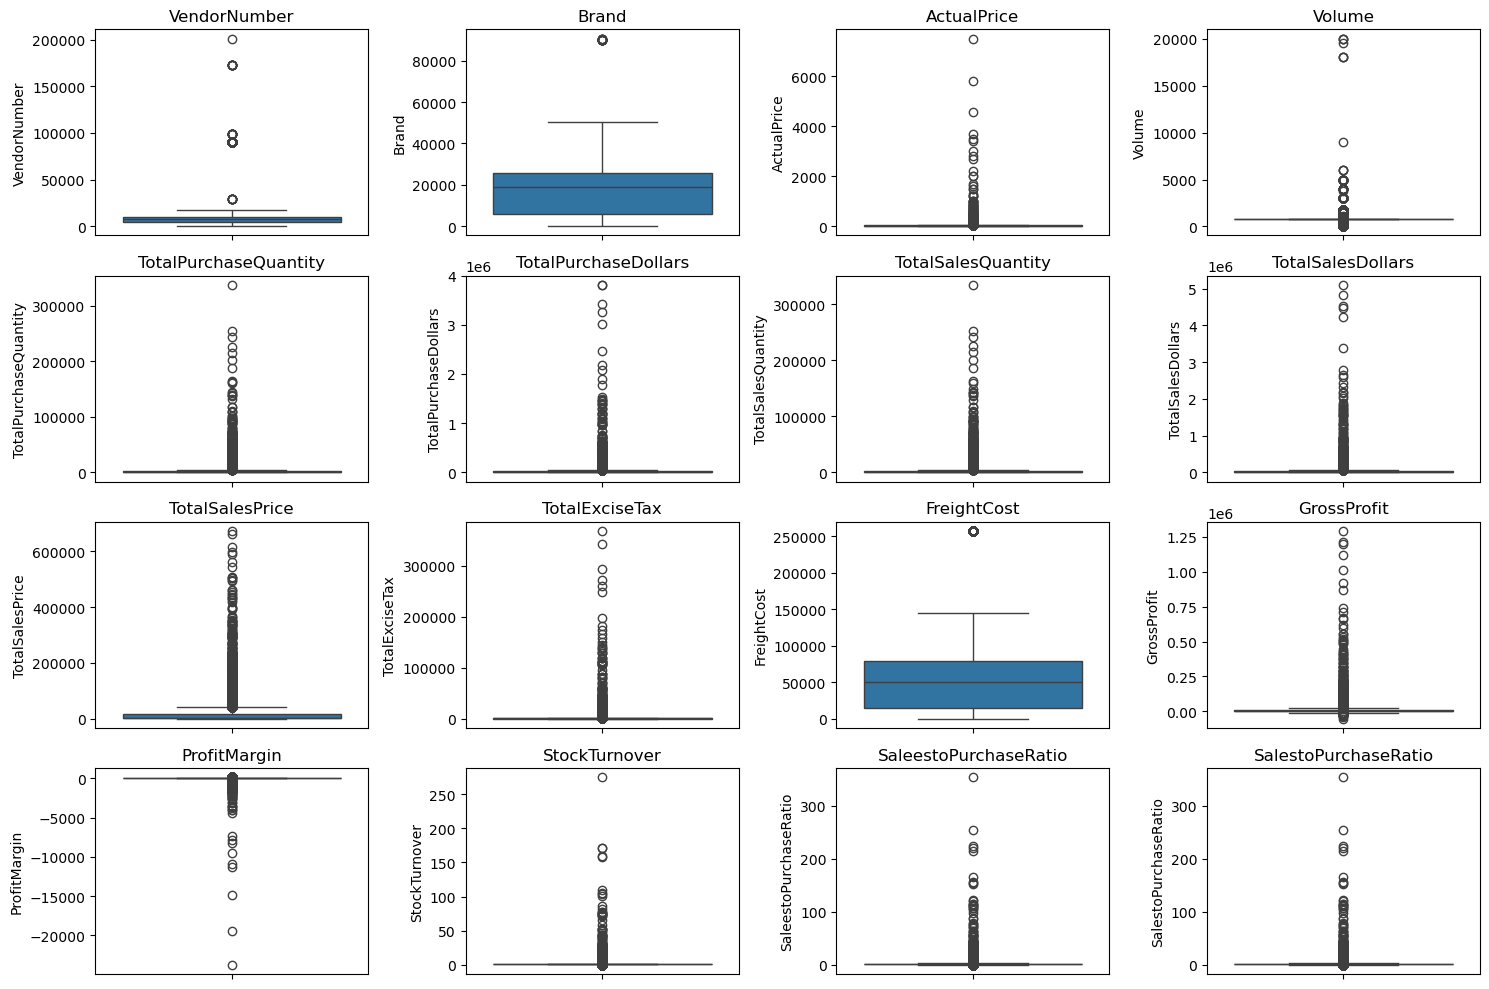

In [5]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4, i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()    
plt.show()

### Summary Statistics Insights

**Negative & Zero Values:**
*   Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
*   Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
*   Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**
*   Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
*   Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
*   Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.


In [6]:
# let's filter the data by removing inconsistencies
df = pd.read_sql_query("""select * from vendor_sales_summary
where GrossProfit >0
and ProfitMargin >0
and TotalSalesQuantity >0""",conn)
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SaleestoPurchaseRatio,SalestoPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.99,50.0,1,0.71,86.0,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,1.396897
8560,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,1.372493
8561,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,1.327594
8562,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,1.266830


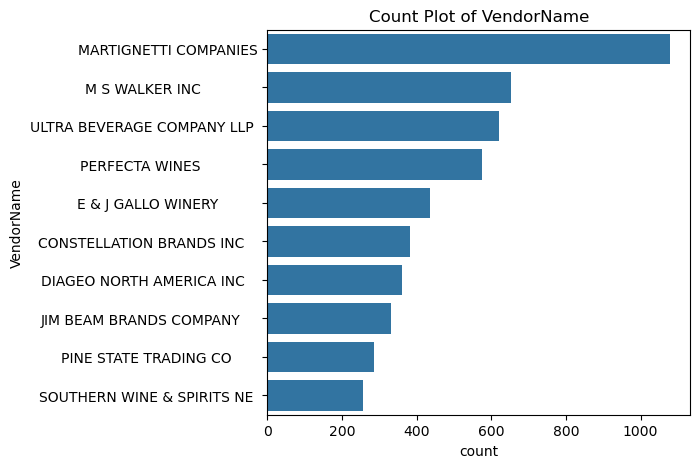

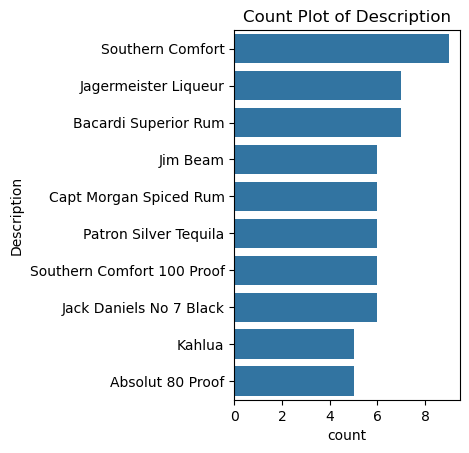

In [7]:
#Count plots for Categorical Columns
Categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12,5))

for i , col in enumerate(Categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])

    
    plt.title(f"Count Plot of {col}")
    plt.show()


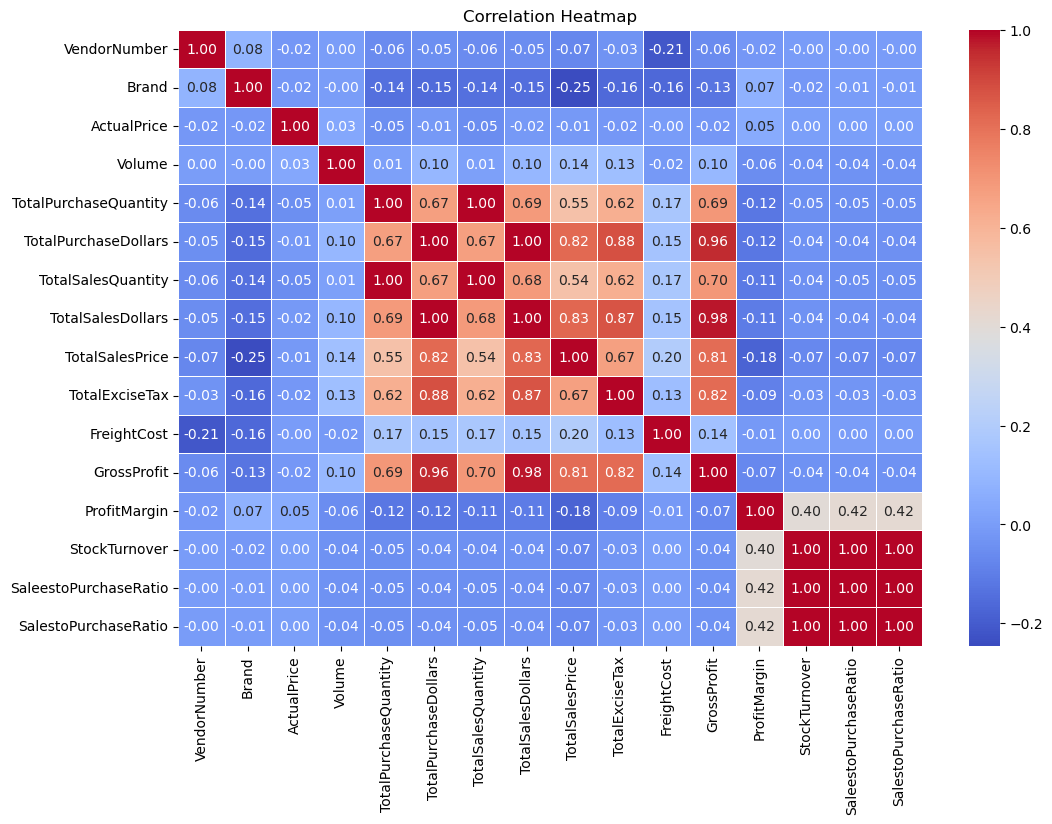

In [8]:
#correlation Heatmap
plt.figure(figsize = (12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm",linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.savefig("aman2.png", dpi= 1000)
plt.show()

### Correlation Insights
*  PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

*  Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

*  Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

*  StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

### Data Analysis
Identify Brands that needs Promotional  or Pricing Adjustments which exhibit lower sales performance but higher profit margins.

In [9]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [10]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85) 
low_sales_threshold

560.299

In [11]:
high_margin_threshold

64.97017552750113

In [12]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance [
     (brand_performance['TotalSalesDollars']<=low_sales_threshold) &
      (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:",target_brands)
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:                        Description  TotalSalesDollars  ProfitMargin
6       12 Days of Pearls Gift Set             309.69     97.678323
45                  4 Orange Vodka             483.78     85.902683
57       A Bichot Clos Marechaudes             539.94     67.740860
59          A Bichot Merc Champs M             515.88     94.552997
96      Absolut Orient Apple Vodka             119.94     87.652159
...                            ...                ...           ...
7588  Woodford Rsv Master Coll Pnt             489.95     73.760588
7663   Zardetto Pros di Coneg Brut             345.86     88.758457
7677         Zerran Tinto Montsant             139.91     77.592738
7686         Zhenka Vodka 80 Proof             240.39     87.303964
7696                     Zorah Red             417.81     67.559417

[198 rows x 3 columns]


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [13]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

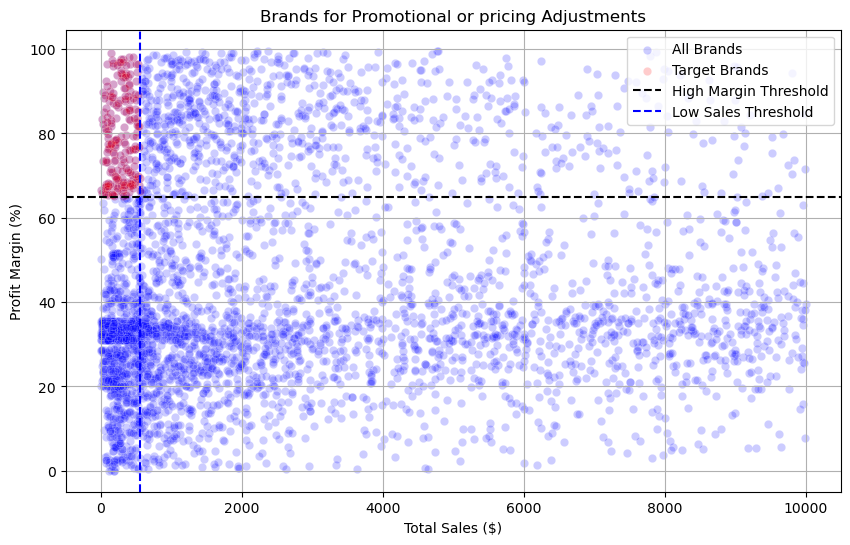

In [14]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue',label="All Brands", alpha =0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red',label="Target Brands", alpha =0.2)

plt.axhline(high_margin_threshold, linestyle = '--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle="--", color='blue', label = "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or pricing Adjustments")
plt.legend()
plt.grid(True)
plt.savefig("aman3.png",dpi=1000)
plt.show()


**Which vendor and brands demonstrate the highest sales performance?**

In [15]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [16]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC       67990099.42
MARTIGNETTI COMPANIES          39276398.80
PERNOD RICARD USA              32063196.19
JIM BEAM BRANDS COMPANY        31423020.46
BACARDI USA INC                24854817.14
CONSTELLATION BRANDS INC       24218745.65
E & J GALLO WINERY             18399899.46
BROWN-FORMAN CORP              18247230.65
ULTRA BEVERAGE COMPANY LLP     16502544.31
M S WALKER INC                 14706458.51
Name: TotalSalesDollars, dtype: float64

In [17]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [18]:
top_brands.apply(lambda x :format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

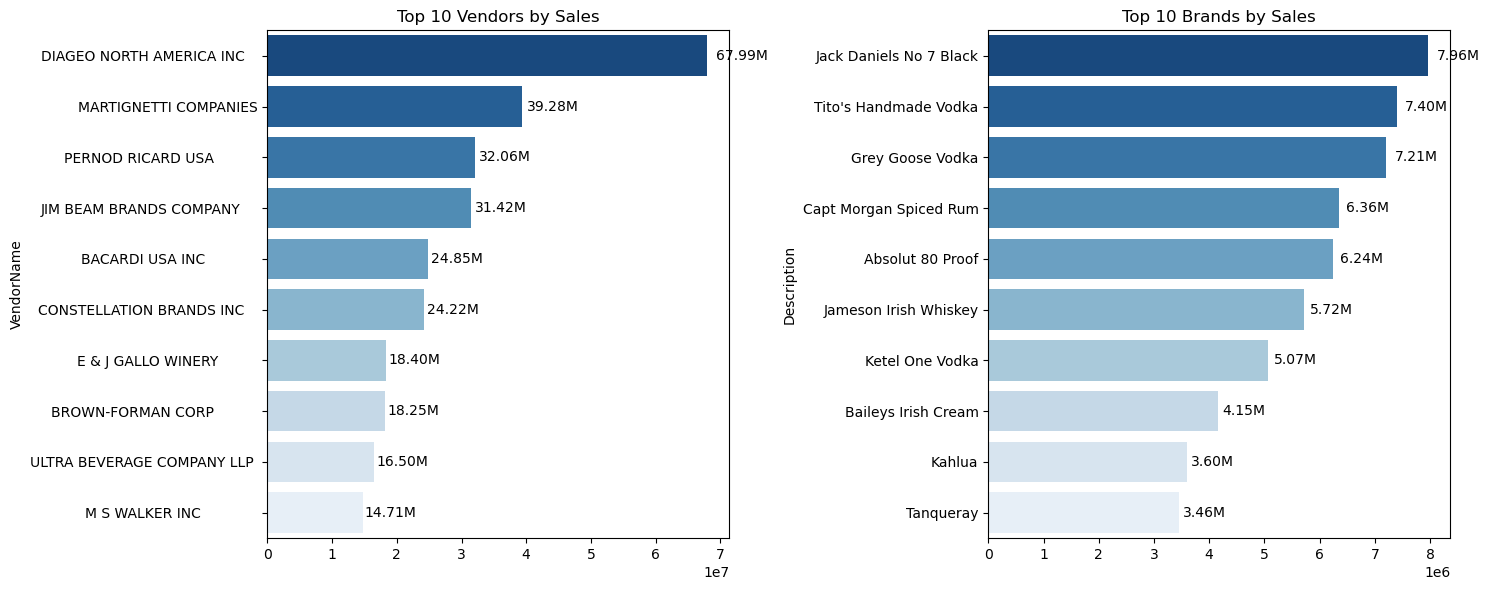

In [19]:
plt.figure(figsize=(15,6))

#Plot for Top Vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(x = top_vendors.values, y = top_vendors.index, palette = "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = "left", va="center", fontsize=10, color="black")


#Plot for Top Brands 
plt.subplot(1,2,2)
ax1 = sns.barplot(x = top_brands.values, y = top_brands.index.astype(str) , palette = "Blues_r")
plt.title("Top 10 Brands by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = "left", va="center", fontsize=10, color="black")
    plt.tight_layout()
plt.show()    

### Which vendors contribute the most to total purchase dollars?

In [20]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [21]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100


In [22]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25464774.04,13811624.76,39276398.80,8.29
69,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
108,UNCORKED,118.74,58.20,176.94,0.00
86,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [23]:

# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors



,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [24]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()*100
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,1630.0
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,8.29,2459.0
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,3235.0
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,3999.0
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,4566.0
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,5063.0
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,5494.0
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,5887.0
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,6250.0
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,6568.0


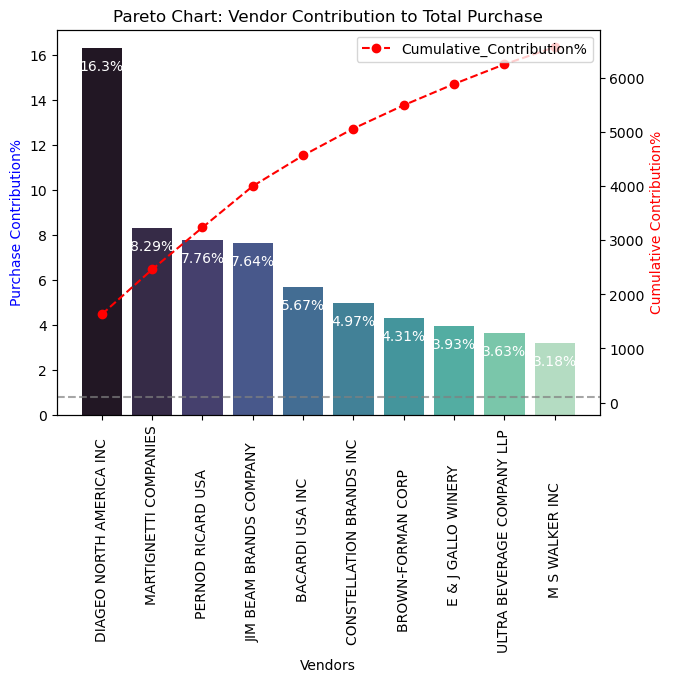

In [25]:
fig, ax1 = plt.subplots(figsize=(7,5))
#Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'],palette = "mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1, str(value)+'%', ha ="center", fontsize=10, color='white')

#Line plot for cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'],color = 'red', marker='o',linestyle='dashed', label='Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'],rotation = 90)
ax1.set_ylabel('Purchase Contribution%',color='blue')
ax2.set_ylabel('Cumulative Contribution%',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

### How much of total procurement is dependent on the top vendors?

In [26]:


print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 65.68 %


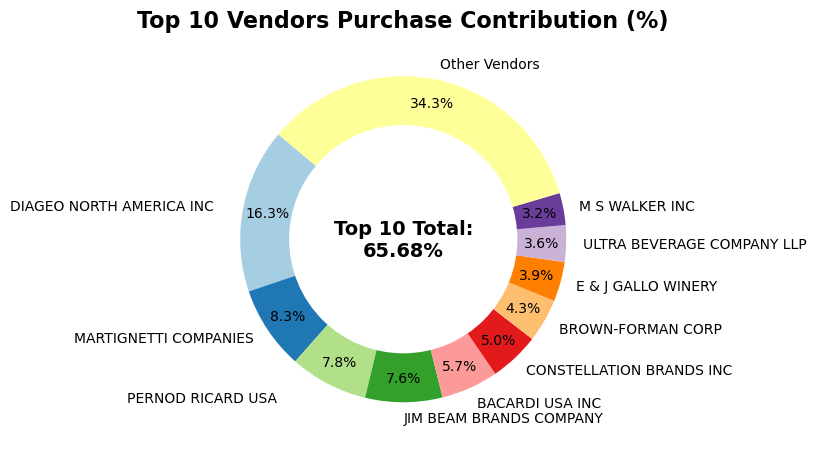

In [36]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct="%.1f%%",
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(
    0, 0,
    f"Top 10 Total:\n{total_contribution:.2f}%",
    horizontalalignment='center',
    verticalalignment='center',
    fontsize=14,
    fontweight='bold'
)

plt.title("Top 10 Vendors Purchase Contribution (%)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig("aman4",dpi=1000)
plt.show()


### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings? 

In [28]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [29]:
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SaleestoPurchaseRatio,SalestoPurchaseRatio,UnitPurchasePrice
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.99,50.0,1,0.71,86.0,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,119.915493,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,97.469388,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,1.337838,0.74
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829,0.39
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,1.396897,21.89
8560,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,1.372493,16.17
8561,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,1.327594,18.24
8562,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,1.266830,23.19


In [30]:
df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels= ["Small", "Medium", "Large"])

In [31]:
df

,VendorNumber,VendorName,Brand,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SaleestoPurchaseRatio,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.99,50.0,1,0.71,86.0,85.14,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,119.915493,0.71,Small
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,97.469388,1.47,Small
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,1.337838,0.74,Small
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,28.059829,0.39,Small
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,6.041667,1.32,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,1.396897,21.89,Large
8560,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,1.372493,16.17,Large
8561,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,1.327594,18.24,Large
8562,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,1.266830,23.19,Large


In [32]:
df.groupby("OrderSize")[["UnitPurchasePrice"]].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


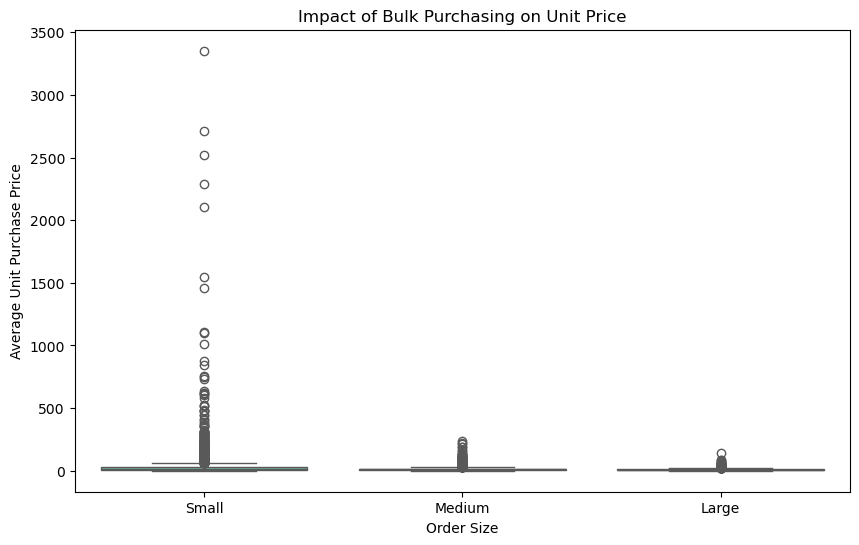

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "OrderSize", y = "UnitPurchasePrice", data = df, palette = "Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

*  Vendors buying in bulk (Large Order Size)get the lowest unit price($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
*  The price difference between Small and Large order is substantial (-72% reduction in unit cost)
*  This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per unit.

### Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [46]:
df[df['StockTurnover']<1].groupby('VendorName')[["StockTurnover"]].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [35]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["ActualPrice"]
print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 3.71M


In [44]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,984.23K
46,JIM BEAM BRANDS COMPANY,761.21K
69,PERNOD RICARD USA,647.40K
117,WILLIAM GRANT & SONS INC,538.71K
30,E & J GALLO WINERY,369.73K
80,SAZERAC CO INC,273.37K
11,BROWN-FORMAN CORP,247.06K
20,CONSTELLATION BRANDS INC,227.37K
62,MOET HENNESSY USA INC,197.64K
54,MAJESTIC FINE WINES,180.73K
